## (2) 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## (3) 데이터 탐색 및 시각화(특성 파악)

In [2]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### count: 항목 개수, unique: 고유값(겹치지 않는 값), top: 빈도수 가장 높은 항복, count: 그 값의 반복 횟수

1. Ticket, Cabin: unique 비중이 큼 -> 특성화 어려움, category 성격 약함 -> 분석 시 필요 X (train, test 모두)
2. Name: 모두 unique값으로 모두 다름. 하지만 이름에 포함된 결혼 여부 등의 정보는 이용할 수 있으나 여기서는 편의를 위해 제거
3. Sex: male의 비중이 높음
4. Embarked: 대부분이 S에서 탑승

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 평균, 표준편차, 최솟값, 사분위수, 최댓값

1. PassengerId: Index역할 -> 생존 여부에는 영향 X
2. Survived: 75% 정도의 승객이 사망(train 기준)
3. Pclass: 1st 25%도 안됨 -> 대부분 2nd, 3rd class
4. Age: 승객 대부분이 2-30대
5. Sibsp, Parch: 대부분의 승객이 가족과 탑승하지 않음
6. Fare: 요금 수준 차이가 큼(표준편차, 3분위수, 최댓값 비교)

#### 결론: 승객의 사망 여부를 Sex, Embarked, Age, Pclass, Fare, Sibsp, Parch의  7개 항목에 영향 받음

1. Sex, Embarked, Pclass, Sibsp, Parch -> 범주형or 이산형 변수
2. Age, Fare -> 연속형 변수 -> 이산형 or 범주형 변수로 통일

*참고

In [9]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
#시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 범주형/이산형 변수 통계

### 1. 성별 기준 생존자 통계

      Sex  Survived
0  female  0.742038
1    male  0.188908


Text(0.5, 0, 'Sex')

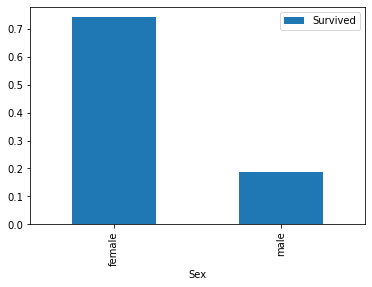

In [11]:
ss=train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(ss)
ss.plot("Sex",kind="bar").set_xlabel("Sex")

여성이 더 많이 생존함

### 2. 객실 등급 기준 생존자 통계

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


Text(0.5, 0, 'Pclass')

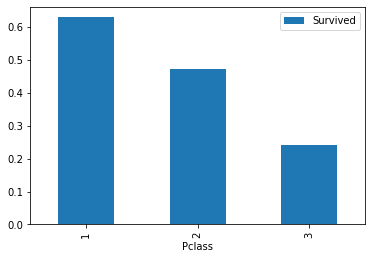

In [12]:
ps=train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(ps)
ps.plot("Pclass",kind="bar").set_xlabel("Pclass")

객실 등급이 더 높을 수록 많이 생존함

### 3. 탑승지 기준 생존자 통계

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


Text(0.5, 0, 'Embarked')

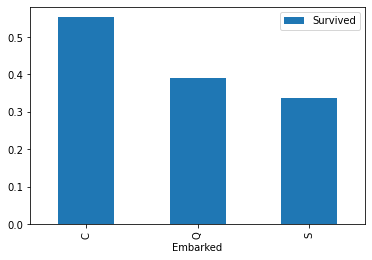

In [13]:
es=train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(es)
es.plot("Embarked",kind="bar").set_xlabel("Embarked")

C에서 탑승한 사람이 더 많이 생존하였음. -> 탑승지와 관계 있는 다른 변수??

#### 3.1. 탑승지 & 객실 등급

<AxesSubplot:xlabel='Embarked', ylabel='count'>

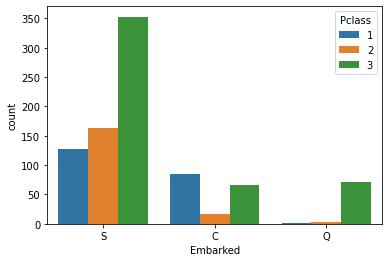

In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning) # warning 처리

sns.countplot('Embarked', hue='Pclass', data=train)

C에서 1st가 차지하는 비중이 높고, S에서 3rd가 차지하는 비중이 높음

#### 3.2. 탑승지 & 성별

<AxesSubplot:xlabel='Embarked', ylabel='count'>

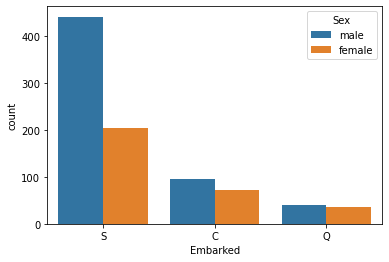

In [15]:
sns.countplot('Embarked', hue='Sex', data=train)

S에서 남자가 더 많이 탄 것을 S의 낮은 생존율과 연관시킬 수 있음

### 4. 함께 탑승한 형제자매 기준 생존자 통계

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


Text(0.5, 0, 'SibSp')

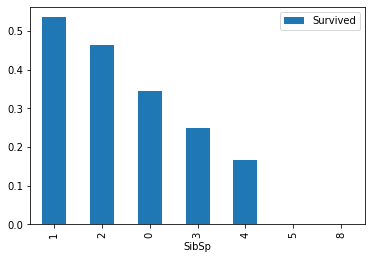

In [16]:
sbs=train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(sbs)
sbs.plot("SibSp",kind="bar").set_xlabel("SibSp")

0명보다는 1~2명의 형제자매와 탑승한 승객의 생존 비율이 높음

### 5. 함께 탑승한 부모/자녀 기준 생존자 통계

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


Text(0.5, 0, 'Parch')

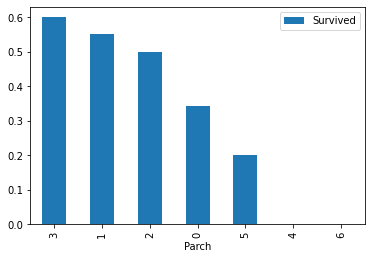

In [17]:
pcs=train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
print(pcs)
pcs.plot("Parch",kind="bar").set_xlabel("Parch")

1~3명의 부모/자녀 동반한 사람의 생존 비율이 높음

## 연속형 변수 통계

### 1. 나이 기준 생존자 통계

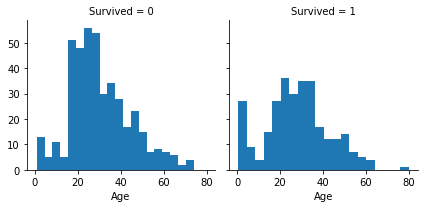

In [18]:
age = sns.FacetGrid(train, col='Survived')
age.map(plt.hist, 'Age', bins=20)

null인 수치 처리, 범주형으로 변형, 다른 요인과의 관계 비교 필요

#### 1.1 나이 & 성별

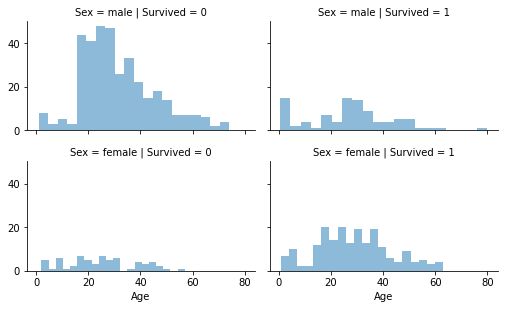

In [19]:
grid = sns.FacetGrid(train, col='Survived', row='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

#### 1.2 나이 & 객실 등급

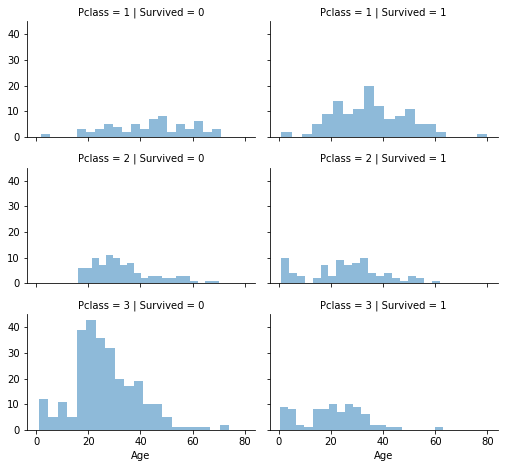

In [20]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

2nd, 3rd class에도 어린 나이의 승객은 생존함 1st는 대칭적인 분포

### 2. 요금 기준 생존 통계

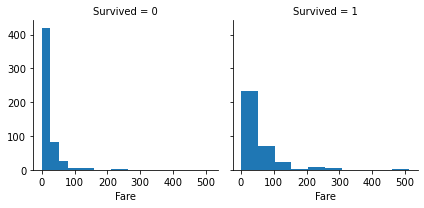

In [21]:
f = sns.FacetGrid(train, col='Survived')
f.map(plt.hist, 'Fare', bins=10)

요금이 높을수록 많이 생존한다? 뚜렷한 관계 잘 안 나옴

#### 2.1 요금 & 성별 & 탑승지

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


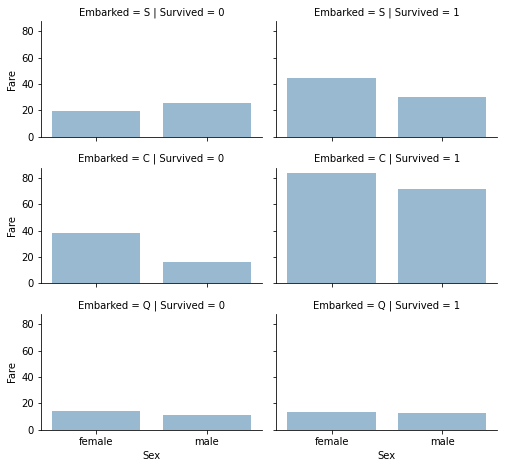

In [22]:
grid = sns.FacetGrid(train, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C에서의 요금이 높고, 1st 비중이 높은 것과 관련이 있을 듯

## (4) 데이터 정제
### 각 변수 처리
#### Name, Ticket, Cabin: 삭제
#### Sex: 숫자 범주형으로 변형(원핫인코딩)
#### Age: Null 값 채우기, 숫자 범주형으로 변형
#### Sibsp, Parch: 변수 하나로 통합
#### Fare: Null값 채우기, 숫자 범주형으로 변형
#### Embarked: Null 값 채우기, 숫자 범주형으로 변형

### 1. 삭제

In [23]:
train= train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test= test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

print(train.shape, test.shape)

(891, 8) (418, 7)


### 2. Sibsp, Parch 통합

In [24]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [25]:
print(train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False))

   FamilySize  Survived
3           4  0.724138
2           3  0.578431
1           2  0.552795
6           7  0.333333
0           1  0.303538
4           5  0.200000
5           6  0.136364
7           8  0.000000
8          11  0.000000


Family size 보다는 가족과 동반했는지 여부로 나뉠 수 있도록 원핫 인코딩(Family size == 1 -> IsAlone = 1, Family size > 1 -> IsAlone = 0)

In [26]:
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

print(train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [27]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,2,0
1,1,1,female,38.0,1,0,71.2833,C,2,0
2,1,3,female,26.0,0,0,7.9250,S,1,1
3,1,1,female,35.0,1,0,53.1000,S,2,0
4,0,3,male,35.0,0,0,8.0500,S,1,1


In [28]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

In [29]:
test['IsAlone'] = 0
test.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,male,34.5,0,0,7.8292,Q,1,0
1,3,female,47.0,1,0,7.0000,S,2,0
2,2,male,62.0,0,0,9.6875,Q,1,1
3,3,male,27.0,0,0,8.6625,S,1,0
4,3,female,22.0,1,1,12.2875,S,3,1


In [30]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

In [31]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,male,22.0,7.2500,S,0
1,1,1,female,38.0,71.2833,C,0
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,0
4,0,3,male,35.0,8.0500,S,1


In [32]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,male,34.5,7.8292,Q,0
1,3,female,47.0,7.0000,S,0
2,2,male,62.0,9.6875,Q,1
3,3,male,27.0,8.6625,S,0
4,3,female,22.0,12.2875,S,1


### 3. 숫자 범주형 변수로 변형

#### 3.1 성별 원핫인코딩 
##### (1) pandas 이용
##### (2) 사이킷런 이용 -> 생략

In [33]:
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,S,0
1,1,1,1,38.0,71.2833,C,0
2,1,3,1,26.0,7.9250,S,1
3,1,1,1,35.0,53.1000,S,0
4,0,3,0,35.0,8.0500,S,1


In [34]:
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})

test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,34.5,7.8292,Q,0
1,3,1,47.0,7.0000,S,0
2,2,0,62.0,9.6875,Q,1
3,3,0,27.0,8.6625,S,0
4,3,1,22.0,12.2875,S,1


#### 3.2 탑승지

In [35]:
train['Embarked'] = train['Embarked'].fillna('S') #Null 값 최빈값으로 대체, test에는 Embarked에 Null이 없음
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,0
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,0
4,0,3,0,35.0,8.0500,0,1


In [37]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,34.5,7.8292,2,0
1,3,1,47.0,7.0000,0,0
2,2,0,62.0,9.6875,2,1
3,3,0,27.0,8.6625,0,0
4,3,1,22.0,12.2875,0,1


In [38]:
print(train["Embarked"].isnull().values.any())
print(test["Embarked"].isnull().values.any())

False
False


#### 3.3  나이
##### (1) Null 채우기 -> 평균값으로

In [39]:
train['Age'].fillna(train['Age'].mean(), inplace=True)

In [40]:
test['Age'].fillna(train['Age'].mean(), inplace=True)

print(train["Age"].isnull().values.any())
print(test["Age"].isnull().values.any())

False
False


##### (2) 범주형으로 변형

In [41]:
train['AgeBand'] = pd.cut(train['Age'], 5)
print(train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True))

            AgeBand  Survived
0    (0.34, 16.336]  0.550000
1  (16.336, 32.252]  0.344168
2  (32.252, 48.168]  0.404255
3  (48.168, 64.084]  0.434783
4    (64.084, 80.0]  0.090909


In [42]:
test['AgeBand'] = pd.cut(train['Age'], 5) #cut: 동일 구간으로 쪼개기(Age: Max = 80)

In [43]:
train.loc[ train['Age'] <= 16, 'Age'] = 0
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age'] = 1
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age'] = 2
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age'] = 3
train.loc[ train['Age'] > 64, 'Age'] = 4

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone,AgeBand
0,0,3,0,1.0,7.2500,0,0,"(16.336, 32.252]"
1,1,1,1,2.0,71.2833,1,0,"(32.252, 48.168]"
2,1,3,1,1.0,7.9250,0,1,"(16.336, 32.252]"
3,1,1,1,2.0,53.1000,0,0,"(32.252, 48.168]"
4,0,3,0,2.0,8.0500,0,1,"(32.252, 48.168]"


In [44]:
train = train.drop(['AgeBand'], axis=1)

In [45]:
test.loc[ test['Age'] <= 16, 'Age'] = 0
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age'] = 1
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age'] = 2
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age'] = 3
test.loc[ test['Age'] > 64, 'Age'] = 4

In [46]:
test = test.drop(['AgeBand'], axis=1)

In [47]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1.0,7.2500,0,0
1,1,1,1,2.0,71.2833,1,0
2,1,3,1,1.0,7.9250,0,1
3,1,1,1,2.0,53.1000,0,0
4,0,3,0,2.0,8.0500,0,1


In [48]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,2.0,7.8292,2,0
1,3,1,2.0,7.0000,0,0
2,2,0,3.0,9.6875,2,1
3,3,0,1.0,8.6625,0,0
4,3,1,1.0,12.2875,0,1


#### 3.3 요금
##### (1) Null 값 채우기

In [49]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True) #test에 있는 1개의 Null값 채우기, train에는 없음
print(test["Fare"].isnull().values.any())

False


##### (2) 범주형 변환

In [50]:
train['FareBand'] = pd.qcut(train['Fare'], 4) #qcut -> 동일 개수로 쪼개기(요금 적은 사람이 훨씬 많음)
print(train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True))

          FareBand  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [51]:
test['FareBand'] = pd.qcut(test['Fare'], 4)

In [52]:
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)

In [53]:
test.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

test = test.drop(['FareBand'], axis=1)

In [54]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,0,3,0,1.0,0,0,0
1,1,1,1,2.0,3,1,0
2,1,3,1,1.0,1,0,1
3,1,1,1,2.0,3,0,0
4,0,3,0,2.0,1,0,1


In [55]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,IsAlone
0,3,0,2.0,0,2,0
1,3,1,2.0,0,0,0
2,2,0,3.0,0,2,1
3,3,0,1.0,0,0,0
4,3,1,1.0,0,0,1


## (5) 모델 선택 및 훈련

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [57]:
X_train = train.drop("Survived", axis=1) #정답 제거
Y_train = train["Survived"] #레이블
X_test  = test.copy() #예측할 데이터셋
X_train_minmax = X_train.copy()
X_test_minmax = X_test.copy()
X_train_std = X_train.copy()
X_test_std = X_test.copy()

### 1. 로지스틱 회귀

In [58]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_predLR = logreg.predict(X_test)

### 2. KNN

In [59]:
knn = KNeighborsClassifier(n_neighbors = 3)# K=3 으로 지정
knn.fit(X_train, Y_train)
Y_predKnn= knn.predict(X_test)

### 3. SVM

In [60]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVC= svc.predict(X_test)

### 4. RandomForest

In [61]:
random_forest = RandomForestClassifier(n_estimators=100)
#n_estimator=트리의 개수, default: 100
random_forest.fit(X_train, Y_train)
Y_predRF = random_forest.predict(X_test)
#RF의 결과; 생존과 사망을 예측하는 종단 노드 생성

In [62]:
X_test=X_test.assign(LR=Y_predLR,Knn=Y_predKnn,SVM=Y_predSVC,RF=Y_predRF)
print(X_test.head(10))

   Pclass  Sex  Age  Fare  Embarked  IsAlone  LR  Knn  SVM  RF
0       3    0  2.0     0         2        0   0    0    0   0
1       3    1  2.0     0         0        0   0    0    0   0
2       2    0  3.0     0         2        1   0    0    0   0
3       3    0  1.0     0         0        0   0    0    0   0
4       3    1  1.0     0         0        1   1    0    1   1
5       3    0  0.0     0         0        1   0    0    0   0
6       3    1  1.0     0         2        1   1    1    1   1
7       2    0  1.0     0         0        0   0    0    0   0
8       3    1  1.0     0         1        0   1    1    1   1
9       3    0  1.0     0         0        0   0    0    0   0


## (6) 평가 및 교차검증

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
scorelog = cross_val_score(logreg, X_train, Y_train, cv=5)
scoreknn = cross_val_score(knn, X_train, Y_train, cv=5)
scoresvm = cross_val_score(svc, X_train, Y_train, cv=5)
scoreRF = cross_val_score(random_forest, X_train, Y_train, cv=5)

In [65]:
print('Logistic Regression: ', scorelog)
print('                KNN: ', scoreknn)
print('                SVM: ', scoresvm)
print('                 RF: ', scoreRF)

Logistic Regression:  [0.77094972 0.76966292 0.78651685 0.7752809  0.79213483]
                KNN:  [0.75418994 0.7247191  0.81460674 0.68539326 0.71348315]
                SVM:  [0.82681564 0.80898876 0.80337079 0.78651685 0.82022472]
                 RF:  [0.7877095  0.78089888 0.78651685 0.80337079 0.85393258]


In [66]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [67]:
models = pd.DataFrame({
    'Model': ["Logistic Regression","Knn","SVM","RF"],
    'Score': [acc_log, acc_knn, acc_svc, acc_random_forest]})
print(models.sort_values(by='Score', ascending=False))

                 Model  Score
3                   RF  85.63
1                  Knn  84.29
2                  SVM  82.04
0  Logistic Regression  78.45


## (7) 제출

In [72]:
PassengerId = []
for i in range(892, 1310):
    PassengerId.append(i)
submission = pd.DataFrame({
    "PassengerId": PassengerId,
    "Survived": Y_predKnn
})

submission.to_csv('submission_knn.csv', index=False)

### 이미 정제된 데이터에 정규화, 표준화 적용하면 더 예측이 안 좋아진다

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(X_train_minmax)
train_scaled = scaler.transform(X_train_minmax)

X_train_minmax = train_scaled 



scaler.fit(X_test_minmax)
test_scaled = scaler.transform(X_test_minmax)
X_test_minmax = test_scaled 


print(X_test_minmax)

In [ ]:
scorelog = cross_val_score(logreg, X_train_minmax, Y_train, cv=5)
scoreknn = cross_val_score(knn, X_train_minmax, Y_train, cv=5)
scoresvm = cross_val_score(svc, X_train_minmax, Y_train, cv=5)
scoreRF = cross_val_score(random_forest, X_train_minmax, Y_train, cv=5)

In [ ]:
print('Logistic Regression: ', scorelog)
print('                KNN: ', scoreknn)
print('                SVM: ', scoresvm)
print('                 RF: ', scoreRF)

In [ ]:
acc_log = round(logreg.score(X_train_minmax, Y_train) * 100, 2)
acc_knn = round(knn.score(X_train_minmax, Y_train) * 100, 2)
acc_svc = round(svc.score(X_train_minmax, Y_train) * 100, 2)
acc_random_forest = round(random_forest.score(X_train_minmax, Y_train) * 100, 2)

In [ ]:
models = pd.DataFrame({
    'Model': ["Logistic Regression","Knn","SVM","RF"],
    'Score': [acc_log, acc_knn, acc_svc, acc_random_forest]})
print(models.sort_values(by='Score', ascending=False))

In [ ]:
from sklearn.preprocessing import StandardScaler


# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(X_train_std)
train_scaled = scaler.transform(X_train_std)
X_train_std = train_scaled

scaler.fit(X_test_std)
test_scaled = scaler.transform(X_test_std)
X_test_std = test_scaled

print(X_test_std)


In [ ]:
scorelog = cross_val_score(logreg, X_train_std, Y_train, cv=5)
scoreknn = cross_val_score(knn, X_train_std, Y_train, cv=5)
scoresvm = cross_val_score(svc, X_train_std, Y_train, cv=5)
scoreRF = cross_val_score(random_forest, X_train_std, Y_train, cv=5)

In [ ]:
print('Logistic Regression: ', scorelog)
print('                KNN: ', scoreknn)
print('                SVM: ', scoresvm)
print('                 RF: ', scoreRF)

In [ ]:
acc_log = round(logreg.score(X_train_std, Y_train) * 100, 2)
acc_knn = round(knn.score(X_train_std, Y_train) * 100, 2)
acc_svc = round(svc.score(X_train_std, Y_train) * 100, 2)
acc_random_forest = round(random_forest.score(X_train_std, Y_train) * 100, 2)

In [ ]:
models = pd.DataFrame({
    'Model': ["Logistic Regression","Knn","SVM","RF"],
    'Score': [acc_log, acc_knn, acc_svc, acc_random_forest]})
print(models.sort_values(by='Score', ascending=False))